<a href="https://colab.research.google.com/github/Psyrus7/AtharvaShinde_INBT04755_September2023/blob/main/Major_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Results for TF-IDF Features:
Accuracy: 0.8844408591307855
Classification Report:
              precision    recall  f1-score   support

    negative       0.87      0.90      0.89      4939
    positive       0.90      0.87      0.88      4978

    accuracy                           0.88      9917
   macro avg       0.88      0.88      0.88      9917
weighted avg       0.88      0.88      0.88      9917



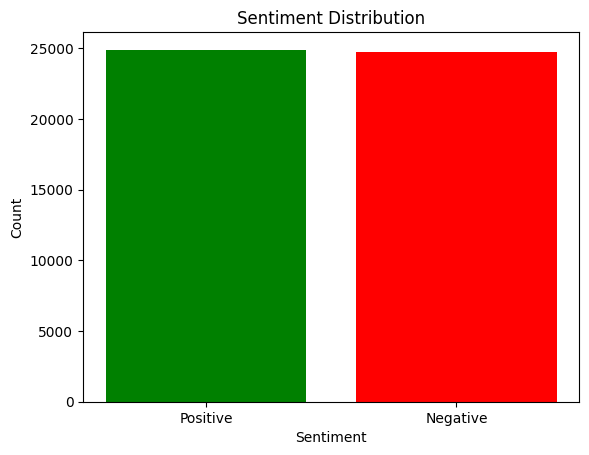

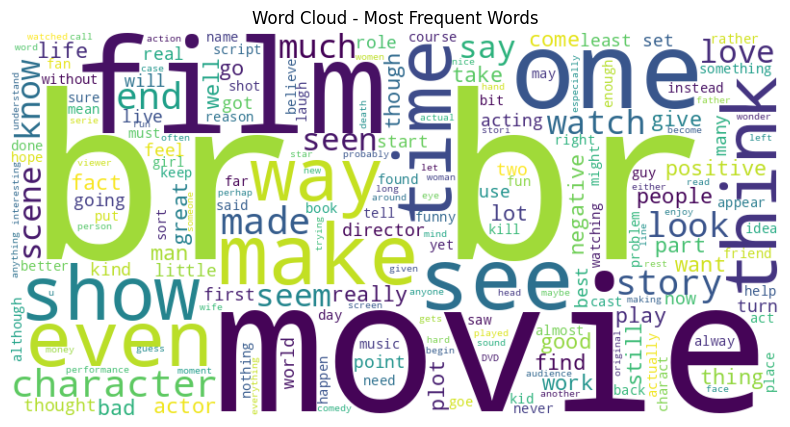

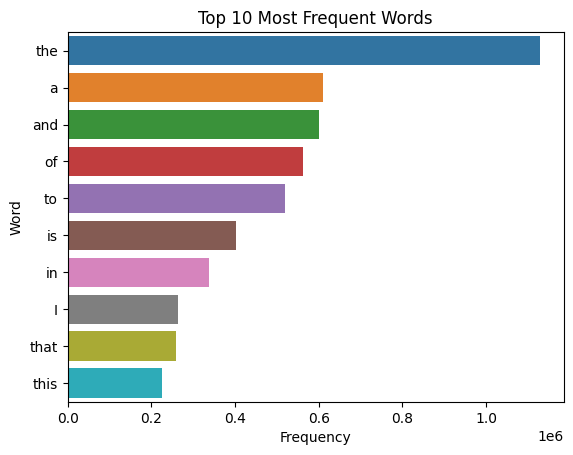

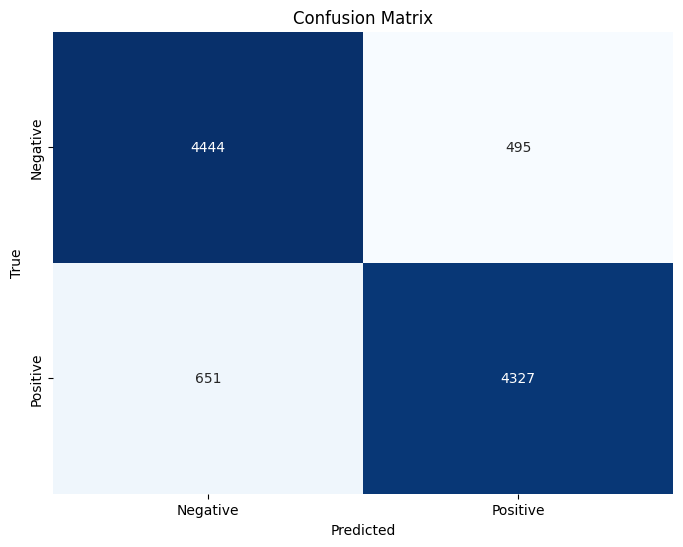

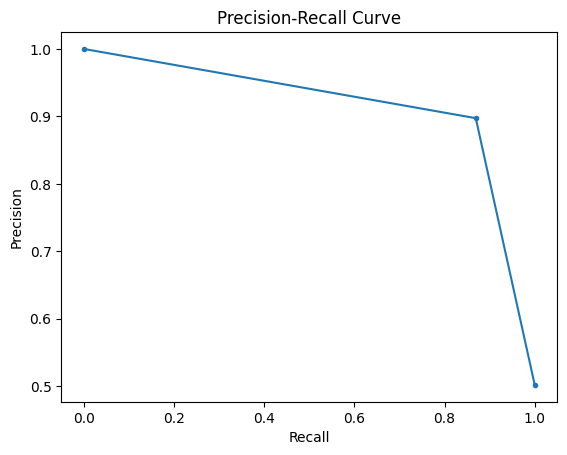

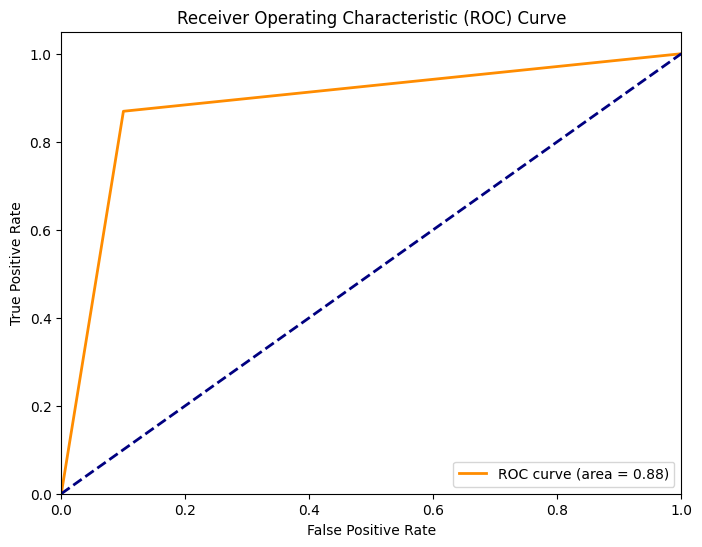

In [8]:
import pandas as pd
import io
import os
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from sklearn.metrics import precision_recall_curve, roc_curve, auc

from google.colab import drive
drive.mount('/content/drive')

# Loading the preprocessed dataset
dataset_path = '/content/drive/MyDrive/Project/preprocessed_imdb.csv'
imdb = pd.read_csv(dataset_path)

# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(imdb['preprocessed_review'], imdb['sentiment'], test_size=0.2, random_state=42)

# Feature Extraction using TF-IDF
vectorizer_tfidf = TfidfVectorizer()
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf = vectorizer_tfidf.transform(X_test)

# Initialize and train a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier using TF-IDF features
nb_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set using TF-IDF features
y_pred_tfidf = nb_classifier.predict(X_test_tfidf)

# Calculate accuracy and display classification report for TF-IDF
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
report_tfidf = classification_report(y_test, y_pred_tfidf)

# Print results
print("\nResults for TF-IDF Features:")
print(f"Accuracy: {accuracy_tfidf}")
print(f"Classification Report:\n{report_tfidf}")

# Visualizing sentiment distribution
sentiment_counts = imdb['sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.xticks(sentiment_counts.index, ['Positive', 'Negative'])
plt.show()

# Creating word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(imdb['preprocessed_review']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Frequent Words')
plt.show()

# Visualizing top N most frequent words
top_n = 10
word_counts = Counter(' '.join(imdb['preprocessed_review']).split())
top_words = word_counts.most_common(top_n)
top_words_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])
sns.barplot(x='Frequency', y='Word', data=top_words_df)
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title(f'Top {top_n} Most Frequent Words')
plt.show()

# Ploting confusion matrix
confusion = confusion_matrix(y_test, y_pred_tfidf)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Ploting precision-recall curve
y_test_binary = y_test.map({'negative': 0, 'positive': 1})
y_pred_bow_binary = pd.Series(y_pred_tfidf).map({'negative': 0, 'positive': 1}).to_numpy()
precision, recall, _ = precision_recall_curve(y_test_binary, y_pred_bow_binary)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Ploting ROC curve
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_bow_binary)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
